In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

히스토그램 생성

(256, 256, 3)
(256, 256)


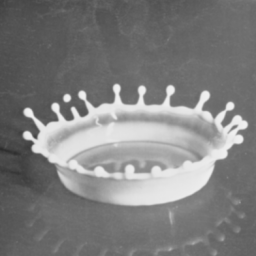

In [14]:
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')

print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

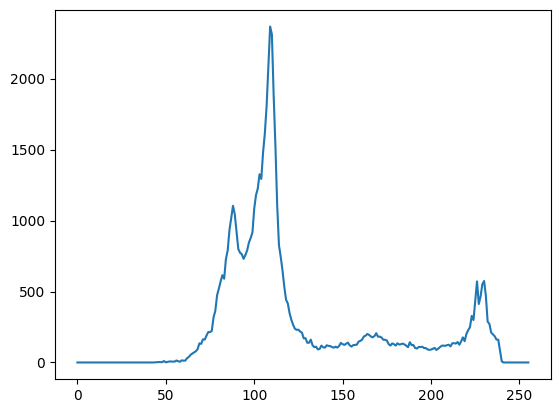

In [15]:
hist = cv2.calcHist([gimg1],[0],None,[256],[0,255])
plt.plot(hist)

(256, 256, 3)
(256, 256)


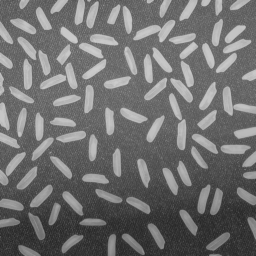

In [9]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
cv2_imshow(gimg2)

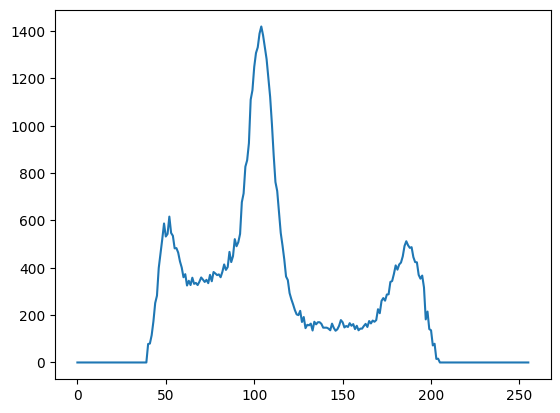

In [10]:
hist = cv2.calcHist([gimg2],[0],None,[256],[0,255])
plt.plot(hist)

(360, 360, 3)
(256, 256)


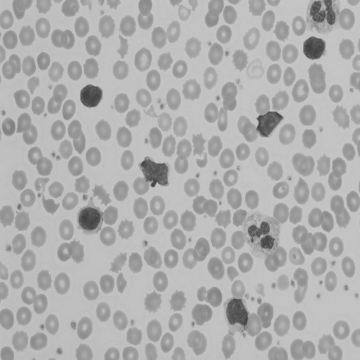

In [16]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
print(img.shape)
gimg3 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
cv2_imshow(gimg3)

이진화

In [23]:
gBin = np.zeros((gimg3.shape[0],gimg3.shape[1]),dtype=np.ubyte)

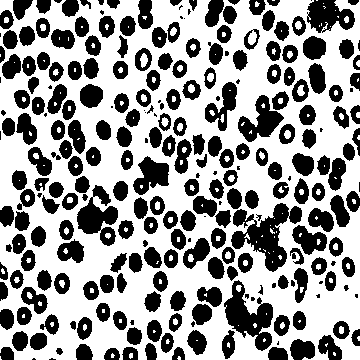

In [24]:
Threhold =170
for h in range(gimg3.shape[0]):
  for w in range(gimg3.shape[1]):
    if gimg3[h,w] > Threhold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

cv2_imshow(gBin)

(360, 360, 3)
(360, 360)


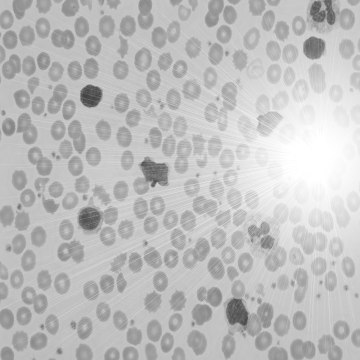

In [25]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')

print(img.shape)
gimg4 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

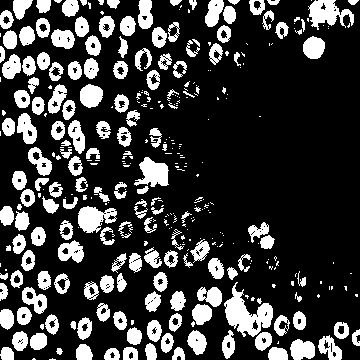

In [27]:
Threhold =170
for h in range(gimg4.shape[0]):
  for w in range(gimg4.shape[1]):
    if gimg4[h,w] > Threhold:
      gBin[h,w] = 0
    else:
      gBin[h,w] = 255

cv2_imshow(gBin)

자동으로 임계값 적용

In [ ]:
T1 =128 #기존 임계값
T2 = 0 #새 임계값
T0 = 1 #기존 임계값과 새임계값의 차이

자동임계값 적용 함수

In [44]:
def threshold_update(img, bimg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(bimg[h,w] == 0):
        sum1 = np.int32(sum1+img[h,w])
        count1 = count1 +1
      else:
        sum2 = np.int32(sum2+img[h,w])
        count2 = count2 +1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1+avg2)/2
  return T



셀 이미지에 실제 적용

In [33]:
gBin = np.zeros((gimg3.shape[0],gimg3.shape[1]),dtype=np.ubyte)

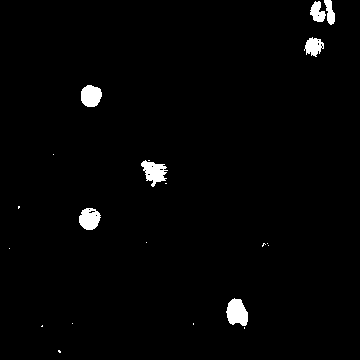

In [34]:
Threhold =128
for h in range(gimg3.shape[0]):
  for w in range(gimg3.shape[1]):
    if gimg4[h,w] > Threhold:
      gBin[h,w] = 0
    else:
      gBin[h,w] = 255

cv2_imshow(gBin)

139.66078741424963


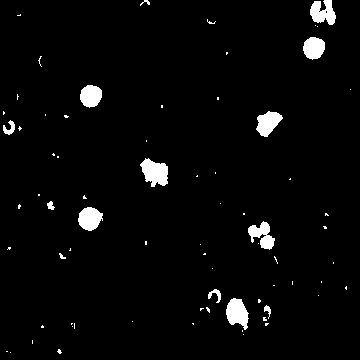

In [60]:
T1=120
T0 = 1
T2 = threshold_update(gimg3, gBin)
while True:


  if(np.abs(T1-T2)< T0):
    break

  else:
    T1 = T2
    for h in range(gimg3.shape[0]):
      for w in range(gimg3.shape[1]):
        if gimg3[h,w] > T1:
          gBin[h,w] = 0
        else:
          gBin[h,w] = 255

print(T2)
cv2_imshow(gBin)


(256, 256, 3)
(256, 256)


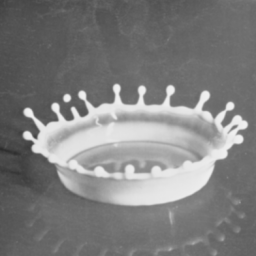

In [55]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')

print(img.shape)
gimg5 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg5.shape)
cv2_imshow(gimg5)

In [56]:
gBin2 = np.zeros((gimg5.shape[0],gimg5.shape[1]),dtype=np.ubyte)

109.73613942652253


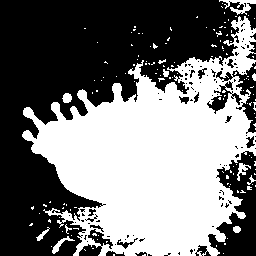

In [59]:
T1=128
T0 = 1
T2 = threshold_update(gimg5, gBin2)
while True:


  if(np.abs(T1 - T2) < T0):
    break

  else:
    T1 = T2
    for h in range(gimg5.shape[0]):
      for w in range(gimg5.shape[1]):
        if gimg5[h,w] > T1:
          gBin2[h,w] = 255
        else:
          gBin2[h,w] = 0

print(T2)
cv2_imshow(gBin2)
